In [1]:
library(Seurat)
library(dplyr)
library(patchwork)


Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built under R 4.4.0 but the current version is
4.4.2; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed

'SeuratObject' was built with package 'Matrix' 1.7.0 but the current
version is 1.7.1; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# Individual merged files from different sequencing experiments
dros_ec_d1.data <- read.table("../data/drosophila_bordercell/out_gene_exon_tagged.dge.txt",
                           header=T,
                           row.names=1)
dros_ec_f1.data <- read.table("../data/drosophila_bordercell/out_gene_exon_tagged_F1.dge.txt",
                      header=T,
                      row.names=1)
dros_ec_f2.data <- read.table("../data/drosophila_bordercell/out_gene_exon_tagged_F2.dge.txt",
                      header=T,
                      row.names=1)


In [3]:
# Turn tables into Seurat objects
dros_ec_d1 <- CreateSeuratObject(counts = dros_ec_d1.data,
                                 project = 'dros_ec',
                                 min.cells = 0,
                                 min.features = 200)
dros_ec_f1 <- CreateSeuratObject(counts = dros_ec_f1.data,
                                 project = 'dros_ec',
                                 min.cells = 0,
                                 min.features = 200)
dros_ec_f2 <- CreateSeuratObject(counts = dros_ec_f2.data,
                                 project = 'dros_ec',
                                 min.cells = 0,
                                 min.features = 200)

Warning message:
"Data is of class data.frame. Coercing to dgCMatrix."
Warning message:
"Data is of class data.frame. Coercing to dgCMatrix."
Warning message:
"Data is of class data.frame. Coercing to dgCMatrix."


In [4]:
dros_ec_all <- merge(dros_ec_d1,
                     y = c(dros_ec_f1, dros_ec_f2),
                     add.cell.ids = c('d1','f1','f2'),
                     project = 'dros_ec')

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


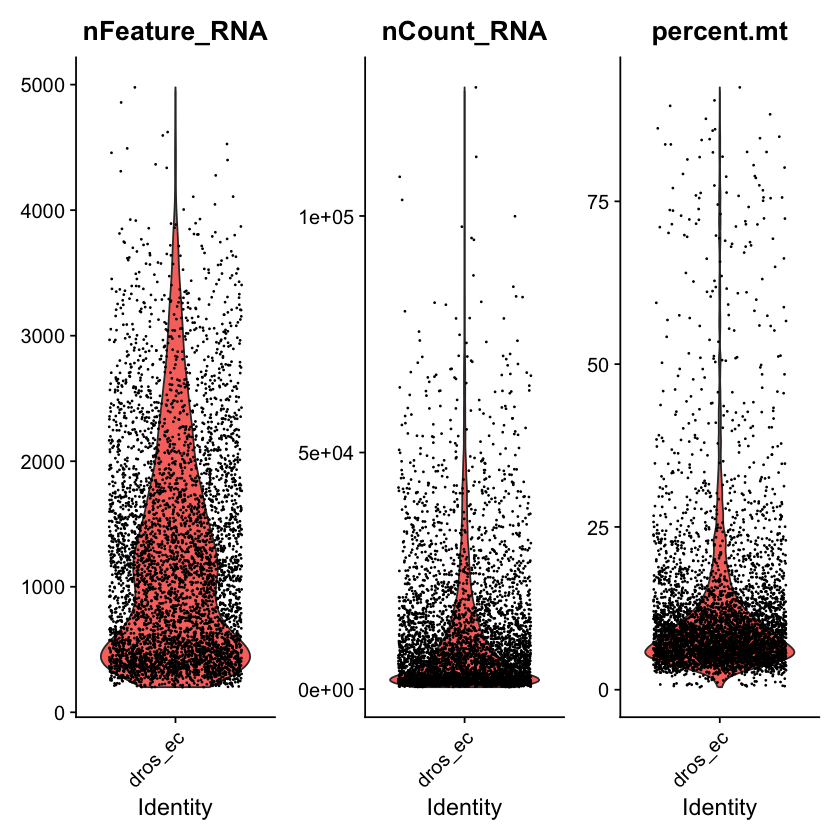

In [5]:
dros_ec_all[['percent.mt']] <- PercentageFeatureSet(dros_ec_all,
                                                    pattern = "^mt:")
VlnPlot(dros_ec_all,
        features = c('nFeature_RNA',
                     'nCount_RNA',
                     'percent.mt'),
        ncol = 3)

In [6]:
dros_ec_all@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<chr>,<dbl>,<int>,<dbl>
d1_AAAGCTGCTAGG,dros_ec,95345,4978,6.226860
d1_CGCCGCTCCACG,dros_ec,68709,3860,5.766348
d1_CCGGTGTGATTC,dros_ec,66386,3617,4.705811
d1_TCTCCGTCCCAG,dros_ec,50964,3438,6.528138
d1_TAGCTTACCTCG,dros_ec,37831,2525,5.469060
d1_AAAGATTTTCGA,dros_ec,78417,4457,7.836311
d1_TACGGGGACTAG,dros_ec,46630,3248,6.549432
d1_ATACCTCCATTC,dros_ec,46470,3327,8.454917
d1_GCAACAGCTGCA,dros_ec,52087,3567,8.714267


In [7]:
dros_ec_all <- NormalizeData(dros_ec_all,
                             normalization.method = 'LogNormalize',
                             scale.factor = 10000)


Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3



In [8]:
dros_ec_all <- FindVariableFeatures(dros_ec_all,
                                    selection.method = 'vst',
                                    nfeatures = 2000)

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3



In [9]:
all.genes <- rownames(dros_ec_all)
dros_ec_all <- ScaleData(dros_ec_all,
                         features = all.genes)
dros_ec_all <- RunPCA(dros_ec_all,
                      features = VariableFeatures(object = dros_ec_all))
# Top up and down for first 5 components
print(dros_ec_all[['pca']],
      dims = 1:5,
      nfeatures = 7)

Centering and scaling data matrix

PC_ 1 
Positive:  Vm26Ab, Yp2, Yp1, Vml, Yp3, Vm32E, psd, dec-1, Vm26Ac, ndl 
	   mfas, babos, CG32276, CG5885, St4, CG33946, CG13998, CG31869, CG33169, CG8860 
	   Pka-C3, Rtnl1, tyn, CG42342, Ir7c, Hsc70-3, PH4alphaEFB, Hexo2, CG7675, Spp 
Negative:  fax, Sam-S, Akap200, CG4250, Six4, CG15347, trol, CG9932, Oat, CG6891 
	   Pde9, Timp, cln3, CG1572, Vha100-2, fu12, CG5958, hebe, Gmap, Indy 
	   eya, CG4476, Npc2a, Inx7, CG2065, Lip4, apt, VhaM8.9, Idh, elB 
PC_ 2 
Positive:  CG14309, CG9747, CG14834, ftz-f1, CG31522, Tsp66E, CG5065, Baldspot, CG14187, mnd 
	   Fcp3C, CG9850, pgant5, CG10237, CG11353, CG11147, mgl, Nep2, gb, Ir7c 
	   CG9990, NLaz, Vm26Ac, rdx, CR44707, dec-1, CG9328, ps, Cad74A, cpo 
Negative:  RpL41, fabp, Nop60B, nop5, bic, CG11267, CG7911, hoip, Nop56, mod 
	   NHP2, dm, CG4038, RpL38, Nap1, FK506-bp1, CG5326, Fib, sesB, CG6770 
	   CG13096, CG11180, Ahcy13, Iris, CG44476, CG1707, CG12288, Pdp1, RpL39, N 
PC_ 3 
Positive:  Nop60B

PC_ 1 
Positive:  Vm26Ab, Yp2, Yp1, Vml, Yp3, Vm32E, psd 
Negative:  fax, Sam-S, Akap200, CG4250, Six4, CG15347, trol 
PC_ 2 
Positive:  CG14309, CG9747, CG14834, ftz-f1, CG31522, Tsp66E, CG5065 
Negative:  RpL41, fabp, Nop60B, nop5, bic, CG11267, CG7911 
PC_ 3 
Positive:  Nop60B, dm, Nap1, nop5, Df31, mod, hoip 
Negative:  CG15347, Pde9, hebe, fu12, Timp, Cyp4s3, CG4476 
PC_ 4 
Positive:  CG14187, CG9990, Obp19c, Fcp3C, Msr-110, amd, CG9850 
Negative:  Yp1, mfas, CG31869, Yp2, CG7675, ndl, Pdi 
PC_ 5 
Positive:  CG10407, CG2781, Obp19c, CG5973, Msr-110, gk, amd 
Negative:  Pen, dhd, stai, Jabba, aret, CycB, wisp 


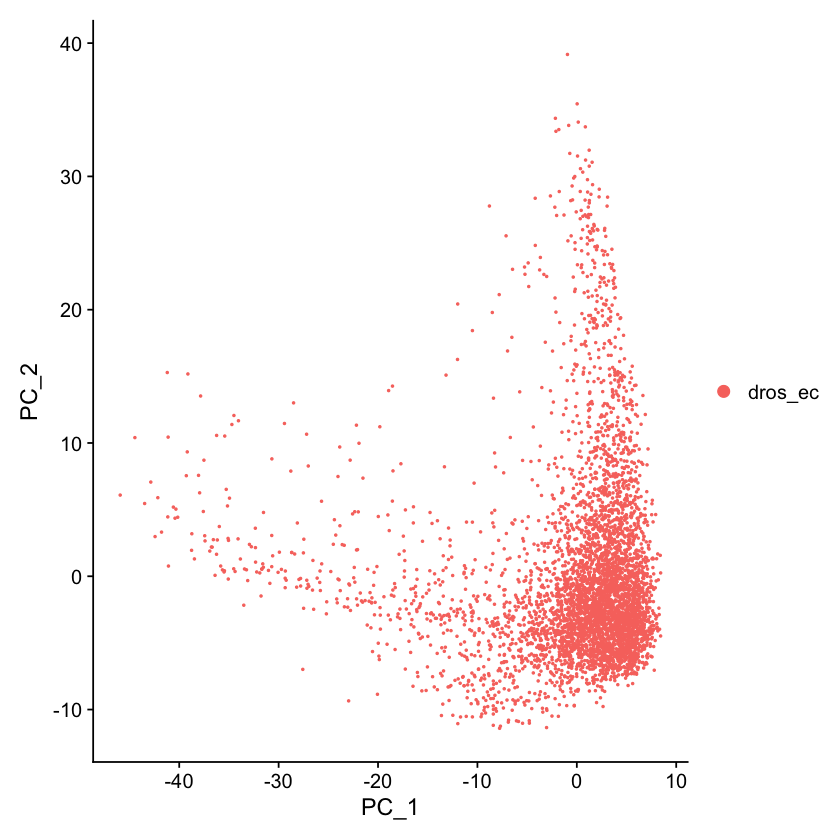

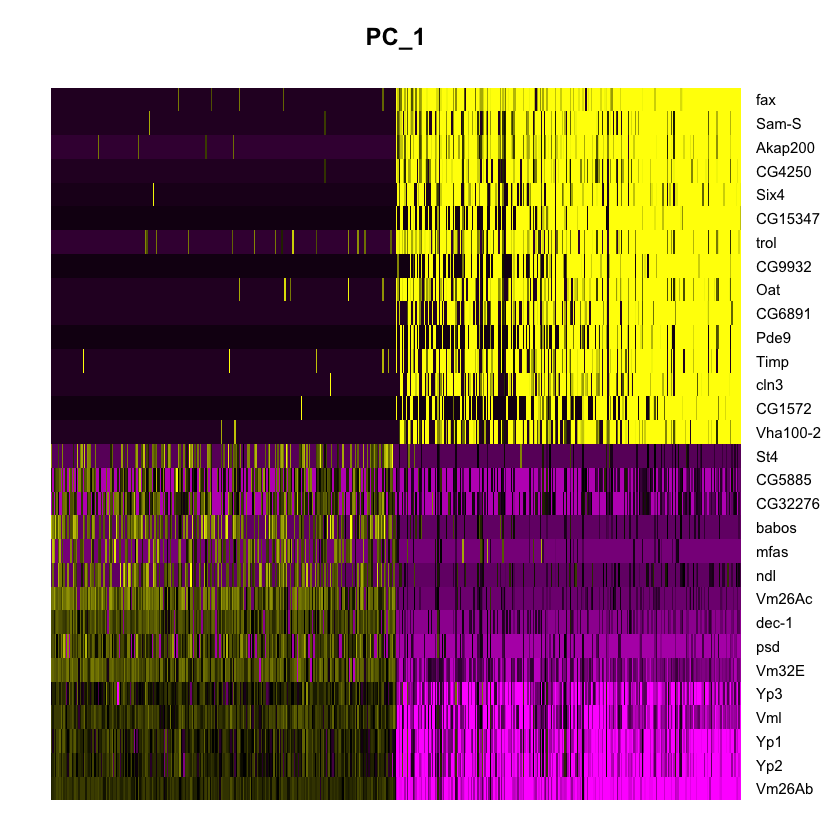

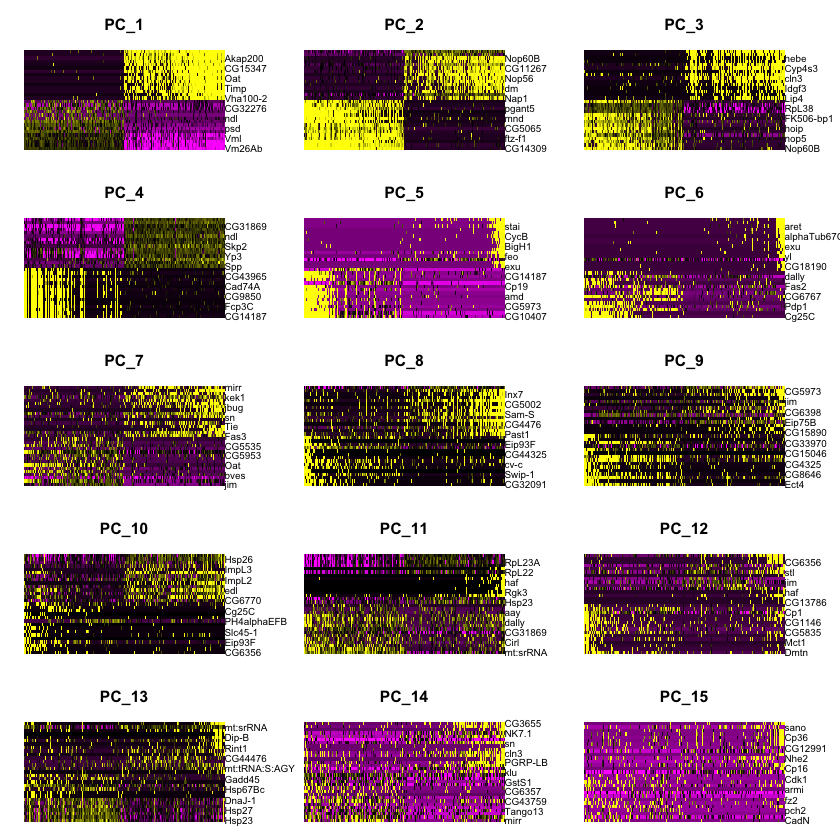

In [10]:
# Graph - pca distribution
DimPlot(dros_ec_all,
        reduction = 'pca')
# Heatmap - These are the 250 most similar cells and the 250 they are most dissimalar to
DimHeatmap(dros_ec_all,
           dims = 1,
           cells = 500,
           balanced = TRUE)
# Heatmap to help decide how PCs to look at
DimHeatmap(dros_ec_all,
           dims = 1:15,
           cells = 500,
           balanced = TRUE)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4793
Number of edges: 155454

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8558
Number of communities: 9
Elapsed time: 0 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
22:20:56 UMAP embedding parameters a = 0.9922 b = 1.112

22:20:56 Read 4793 rows and found 19 numeric columns

22:20:56 Using Annoy for neighbor search, n_neighbors = 30

22:20:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:20:56 Writing NN index file to temp file /var/folders/wl/5x49grmn56v77c01bw965mj00000gn/T//RtmpsCKPCg/filec8ff2773fa0a

22:20:56 Searching Annoy index using 1 thread, search_k = 3000

22:20:57 Annoy recall = 100%

22:20:57 Commencing smooth kNN distance calibrat

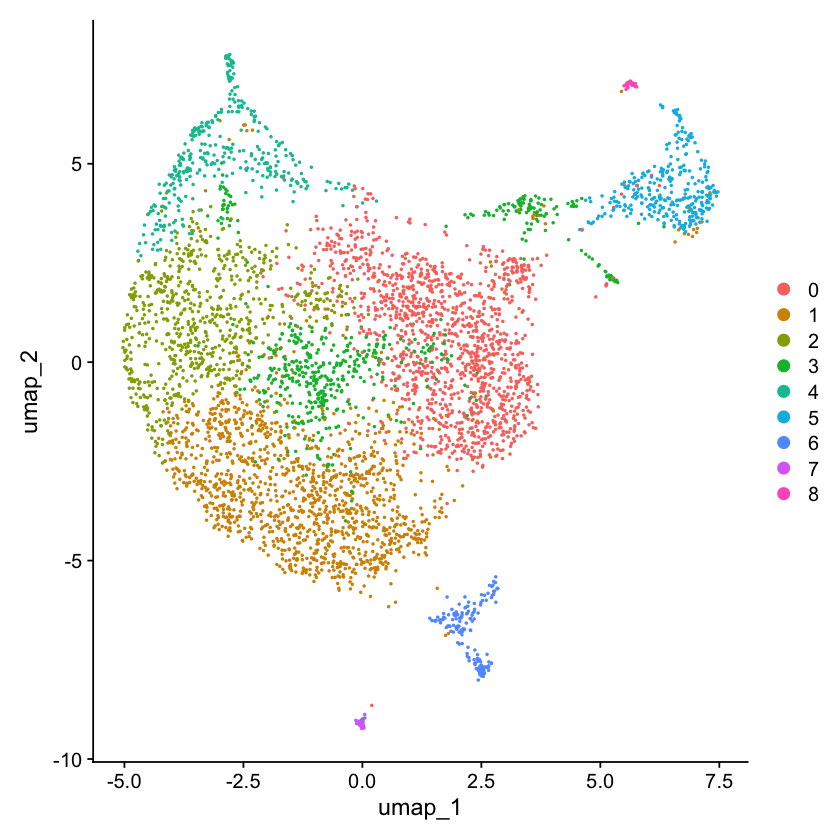

In [11]:
dros_ec_all <- FindNeighbors(dros_ec_all,
                             dims = 1:19)
dros_ec_all <- FindClusters(dros_ec_all,
                            resolution = .4) # lower resolution = more communities, higher = larger
# Cluster IDs of first 5 cells
#head(Idents(dros_ec_all),5)
dros_ec_all <- RunUMAP(dros_ec_all,
                       dims = 1:19)
DimPlot(dros_ec_all,
        reduction = 'umap')

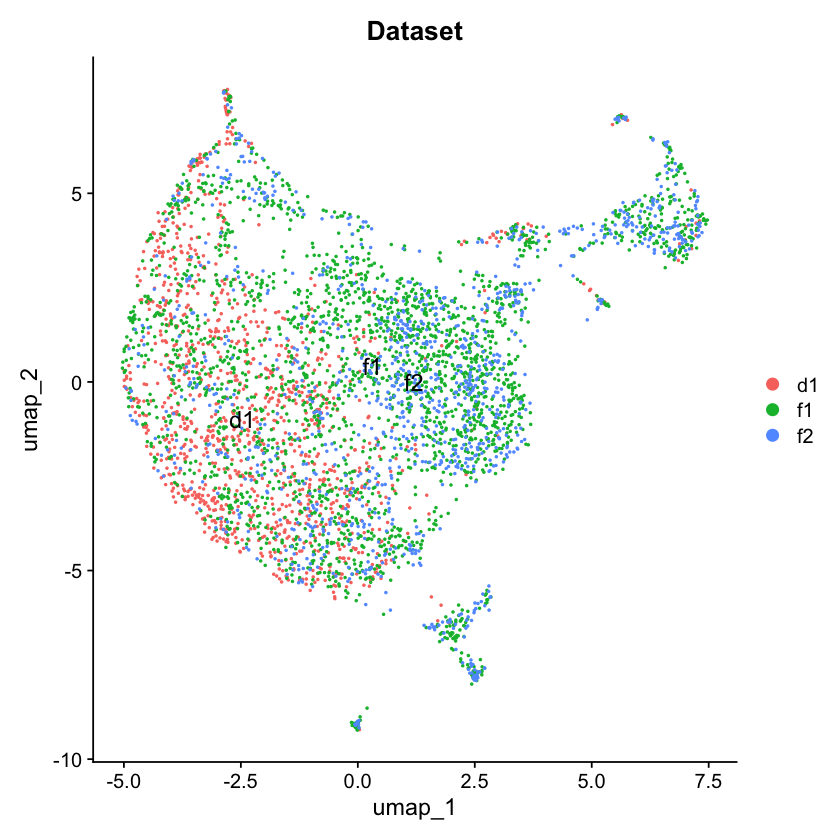

In [12]:
# Split names to get dataset
dros_ec_all@meta.data$Dataset = sapply(strsplit(colnames(dros_ec_all), "_"), function(x) x[1])
# Color UMAP by dataset
DimPlot(dros_ec_all,
        reduction = 'umap',
        group.by = 'Dataset',
        label = TRUE,
        label.size = 5)

In [13]:
saveRDS(dros_ec_all, paste0("../data/drosophila_bordercell/dros_ec_all.rds"))

In [ ]:
# Save result to anndata
dros_ec_all <- readRDS(paste0("../data/drosophila_bordercell/dros_ec_all.rds"))

library(anndataR)
dros_ec_all <- JoinLayers(object = dros_ec_all, layers = "counts")
# Remove `data.1`, `data.2`, `data.3` from the RNA assay
dros_ec_all@assays$RNA$data.1 <- NULL
dros_ec_all@assays$RNA$data.2 <- NULL
dros_ec_all@assays$RNA$data.3 <- NULL


In [19]:
ad1 = anndataR::from_Seurat(dros_ec_all)
# Save as h5ad
anndataR::write_h5ad(ad1, "../data/drosophila_bordercell/dros_ec_all.h5ad", mode = "w")